SVM Model Accuracy: 0.975
SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.92      0.94      0.93        36
           2       1.00      1.00      1.00        35
           3       0.97      0.97      0.97        37
           4       1.00      1.00      1.00        36
           5       1.00      0.97      0.99        37
           6       1.00      1.00      1.00        36
           7       0.95      1.00      0.97        36
           8       0.97      0.89      0.93        35
           9       0.95      0.97      0.96        36

    accuracy                           0.97       360
   macro avg       0.98      0.97      0.97       360
weighted avg       0.98      0.97      0.97       360

SVM Confusion Matrix:
[[36  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  1  1]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 36  0  0  0  0  0  1]
 [ 0  0  0  0 36  0  0  0  0  0]
 

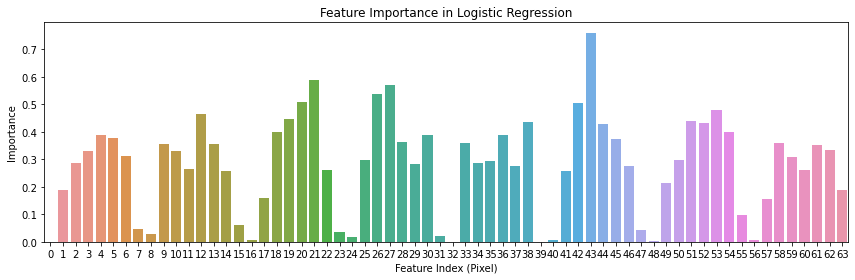

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

warnings.filterwarnings("ignore")

data = load_digits()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(kernel='linear', probability=True, max_iter=-1)
svm_model.fit(X_train_scaled, y_train)

y_pred_svm = svm_model.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, y_pred_svm)

print("SVM Model Accuracy:", svm_accuracy)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

logistic_model = LogisticRegression(
    max_iter=2000,
    solver="lbfgs",
    multi_class="auto"
)
logistic_model.fit(X_train_scaled, y_train)

y_pred_logistic = logistic_model.predict(X_test_scaled)
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)

print("\nLogistic Regression Model Accuracy:", logistic_accuracy)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logistic))
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logistic))

print("\nComparison of Models:")
print(f"SVM Accuracy: {svm_accuracy:.4f}")
print(f"Logistic Regression Accuracy: {logistic_accuracy:.4f}")
feature_importance = np.abs(logistic_model.coef_).mean(axis=0)

plt.figure(figsize=(12, 4))
sns.barplot(x=np.arange(len(feature_importance)), y=feature_importance)
plt.xlabel("Feature Index (Pixel)")
plt.ylabel("Importance")
plt.title("Feature Importance in Logistic Regression")
plt.tight_layout()
plt.show()
